# NYC Crash Analysis and Severity prediction with XGBoost



### IMPORT FUNCTION AND LIBRARIES

In [1]:
import importlib
import NYC_crash_utility
importlib.reload(NYC_crash_utility)
from NYC_crash_utility import (
    load_csv, inspect_data, missing_values, drop_columns, add_crash_type,
    feature_engineering, fill_borough, visualize_crash_distribution,
    visualize_hourly_crash_distribution, visualize_monthly_crash_trend,
    prepare_and_plot_zipcode_crashes, add_severity_class, prepare_tree_dataset, 
    xgboost_severity_classifier, plot_features, xgboost_severity_classifier_tr, xgboost_class_weight_classifier, plot_confusion_matrix, 
    get_confusion_matrix_at_threshold
)
import matplotlib.pyplot as plt

ImportError: cannot import name 'top_contributing_factors' from 'NYC_crash_utility' (C:\Users\efade\Project NYC GIT\NYC_crash_utility.py)

### Loading dataset

In [2]:
df=load_csv('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')

Loaded: ~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv


In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


## EDA, cleaning, feature engineering


In [4]:
inspect_data(df)

Column Types:
CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VE

In [5]:
# drop COLISION_ID
df=drop_columns(df, ['COLLISION_ID'])

Dropped columns: COLLISION_ID
Dataset shape: 2193482  rows and 28  columns


In [6]:
# expecting df for missing values befor engineering and cleaning
missing_values(df)

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           674998
ZIP CODE                          675271
LATITUDE                          240130
LONGITUDE                         240130
LOCATION                          240130
ON STREET NAME                    475329
CROSS STREET NAME                 837549
OFF STREET NAME                  1810527
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7647
CONTRIBUTING FACTOR VEHICLE 2     350010
CONTRIBUTING FACTOR VEHICLE 3    2034954
CONTRIBUTING FACTOR VEHICLE 4    2157325
CONTRIBUTING FACTOR VEHICLE 5    2183583
VEHICLE TYPE CODE 1                15707
VEHICLE TYPE COD

### Features engineering

In [7]:
updated_df=feature_engineering(df)

Date and Time features are successfully extracted!
Columns CRASH DATETIME, HOUR, DAY_OF_WEEK, DAY_NAME, YEAR, MONTH are succesfully added!
Feature IS_WEEKEND is succesfully added!
feature IS_PUBL_HOLIDAY is successfully added!
feature IS_HIGHWAY is successfully added!
Feature IS_BRIDGE added
feature NUM_DRIVERS is successfully added!


In [8]:
# drop redandant columns withextracted values
updated_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CRASH DATETIME', 'HOUR',
       'DAY_OF_WEEK', 'DAY_NAME', 'YEAR', 'MONTH', 'IS_WEEKEND',
       'IS_PUBL_HOLIDAY', 'IS_HIGHWAY', 'IS_BRIDGE', 'NUM_DRIVERS'],
      dtype='object')

In [9]:
# drop redandant columns withextracted values
col_list=['CRASH DATE', 'CRASH TIME', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME','VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
updated_df=drop_columns(updated_df, col_list)

Dropped columns: CRASH DATE, CRASH TIME, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5
Dataset shape: 2193482  rows and 29  columns


In [10]:
updated_df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,HOUR,DAY_OF_WEEK,DAY_NAME,YEAR,MONTH,IS_WEEKEND,IS_PUBL_HOLIDAY,IS_HIGHWAY,IS_BRIDGE,NUM_DRIVERS
0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,...,2,5,Saturday,2021,9,1,0,1,0,2
1,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,...,11,5,Saturday,2022,3,1,0,0,1,1
2,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",1.0,0.0,0,0,0,...,1,2,Wednesday,2023,11,0,0,1,0,3
3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,...,6,2,Wednesday,2022,6,0,0,0,1,2
4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,...,13,2,Wednesday,2022,9,0,0,0,1,1


In [11]:
# copy updated_df for pie chart
df_pie=updated_df.copy()

In [12]:
# drop contributing vehicle
updated_df=drop_columns(updated_df, ['CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5' ])

Dropped columns: CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5
Dataset shape: 2193482  rows and 24  columns


In [13]:
# fill BOROUGH 
df1 = fill_borough(updated_df)


column BOROUGH is filled for missing values!


In [14]:
# checking missing values after cleaning
missing_values(df1)

BOROUGH                               0
ZIP CODE                         675271
LATITUDE                         240130
LONGITUDE                        240130
LOCATION                         240130
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CRASH DATETIME                        0
HOUR                                  0
DAY_OF_WEEK                           0
DAY_NAME                              0
YEAR                                  0
MONTH                                 0
IS_WEEKEND                            0
IS_PUBL_HOLIDAY                       0
IS_HIGHWAY                            0
IS_BRIDGE                             0
NUM_DRIVERS                           0
dtype: int64

Missing value percentages 

### PLOTS

In [15]:
# YEARLY CRASH FATALITY DISTRIBUTION
df1=add_crash_type(df1)

Crash type counts:
 CRASH_TYPE
No victims    1665235
Injury         524953
Fatal            3294
Name: count, dtype: int64

Crash type percentages:
 CRASH_TYPE
No victims    75.92
Injury        23.93
Fatal          0.15
Name: count, dtype: float64


C:\Users\efade\AppData\Local\Temp\ipykernel_2640\3707586809.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  abs_figure.show()
C:\Users\efade\AppData\Local\Temp\ipykernel_2640\3707586809.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pct_figure.show()


<Figure size 1000x600 with 0 Axes>

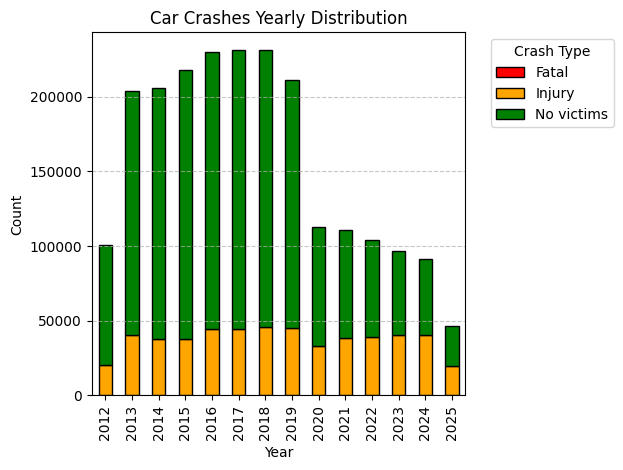

<Figure size 1000x600 with 0 Axes>

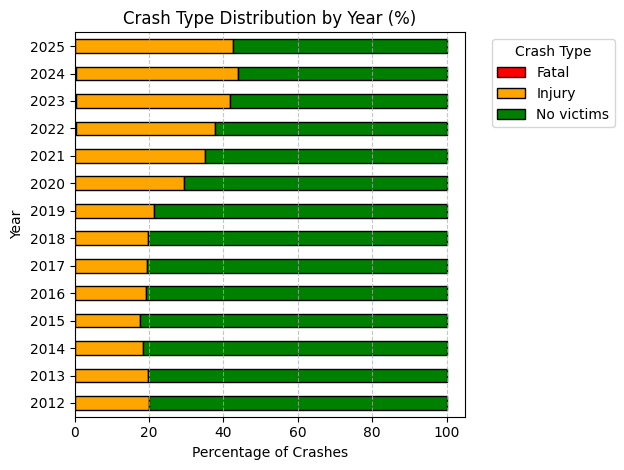

In [16]:
# VISUALIZATION OF CRASH TYPE DISTRIBUTION
abs_figure, pct_figure = visualize_crash_distribution(df1)
abs_figure.show()
pct_figure.show()

C:\Users\efade\AppData\Local\Temp\ipykernel_2640\3110244363.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1000x500 with 0 Axes>

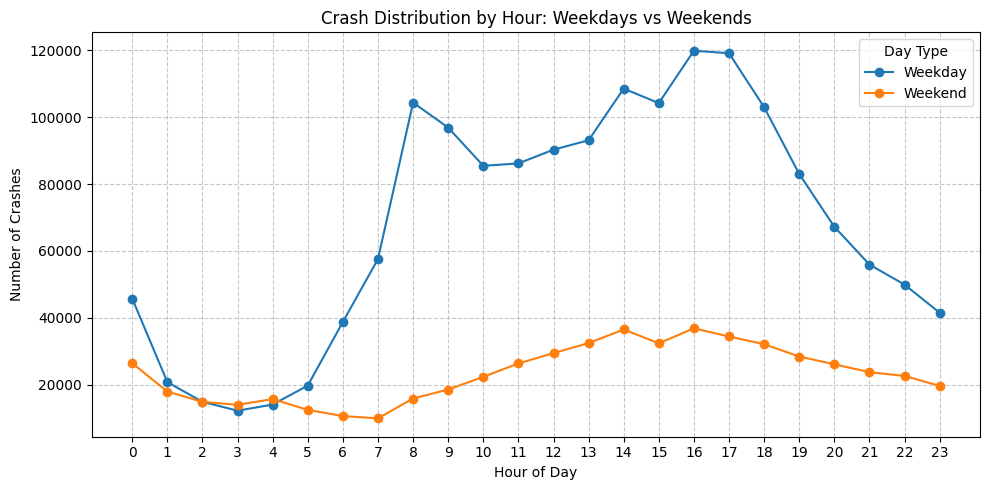

In [17]:
# 
fig = visualize_hourly_crash_distribution(df1)
fig.show()

C:\Users\efade\AppData\Local\Temp\ipykernel_2640\3054834867.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


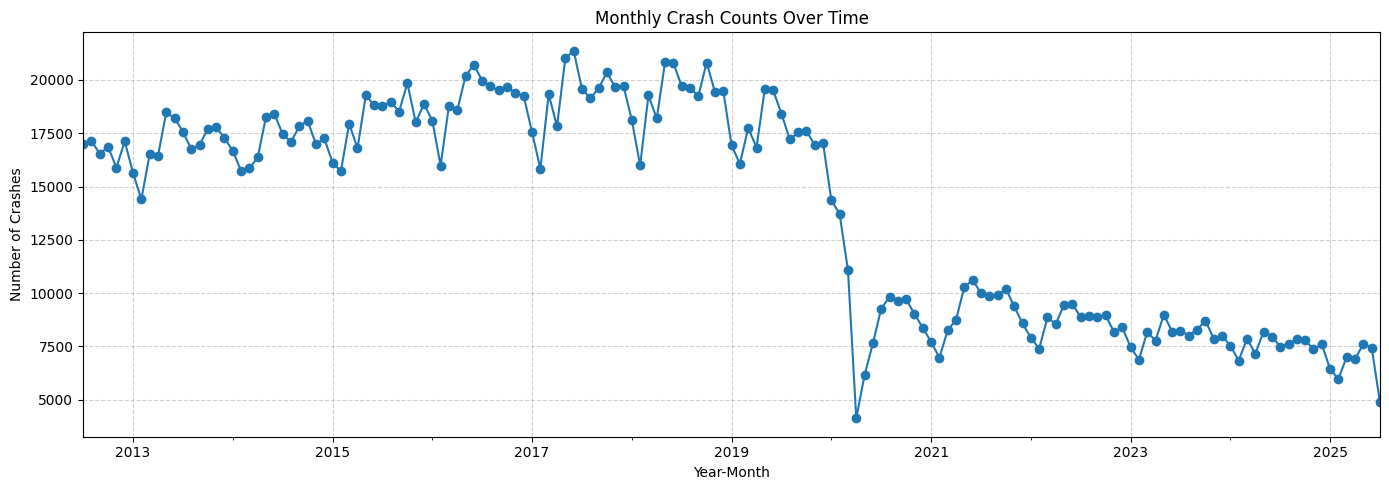

In [18]:
# time series over the years
fig = visualize_monthly_crash_trend(df1)
fig.show()
# fig.savefig('monthly_crash_trend.png')

C:\Users\efade\AppData\Local\Temp\ipykernel_2640\373214405.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


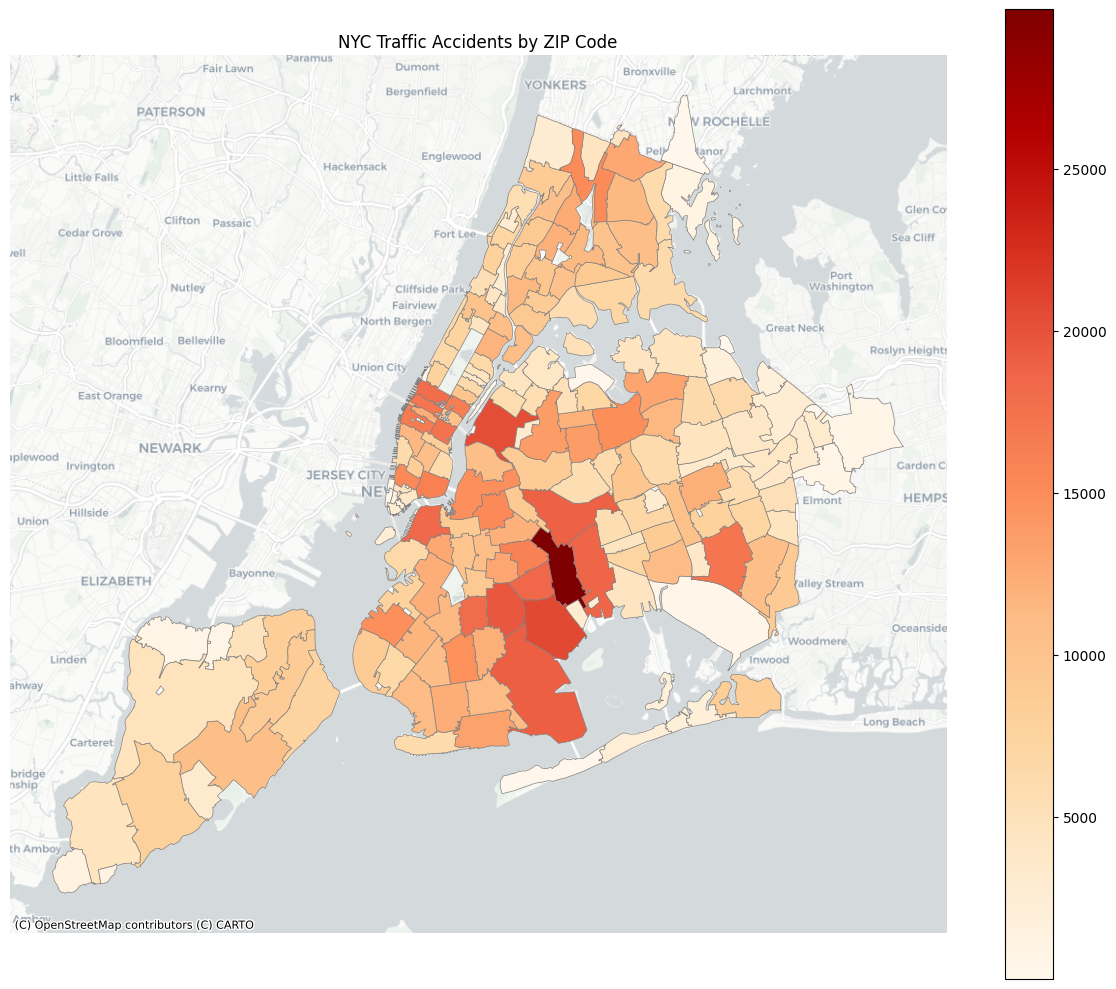

In [20]:
# choropleth map
fig, zip_map = prepare_and_plot_zipcode_crashes(df1)
fig.show() 

### Creating target variable SEVERITY_CLASS

In [22]:
# ADD severity class
df1 = add_severity_class(df1)

Binary column 'SEVERITY_CLASS' added based on 'CRASH_TYPE':
SEVERITY_CLASS
0    0.759174
1    0.240826
Name: proportion, dtype: float64


In [23]:
# DrOP ALL RANDOM COLUMNS
df1.columns

Index(['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CRASH DATETIME', 'HOUR', 'DAY_OF_WEEK', 'DAY_NAME', 'YEAR', 'MONTH',
       'IS_WEEKEND', 'IS_PUBL_HOLIDAY', 'IS_HIGHWAY', 'IS_BRIDGE',
       'NUM_DRIVERS', 'CRASH_TYPE', 'YEAR_MONTH', 'SEVERITY_CLASS'],
      dtype='object')

In [24]:
# assign all redundant columns to list
list_col=['LOCATION','CRASH DATETIME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 
         'DAY_NAME', 'YEAR', 'YEAR_MONTH']

In [25]:
# drop columns from the list
df_clean=drop_columns(df1, list_col)

Dropped columns: LOCATION, CRASH DATETIME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, DAY_NAME, YEAR, YEAR_MONTH
Dataset shape: 2193482  rows and 14  columns


## DATA MODELING


In [26]:
# copy dataset
df_tree=df_clean.copy()

### XGBoost


In [27]:
# modeling
results_xgb = xgboost_severity_classifier(df_tree)

Accuracy:  0.7645

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86    332914
           1       0.60      0.07      0.12    105783

    accuracy                           0.76    438697
   macro avg       0.69      0.53      0.49    438697
weighted avg       0.73      0.76      0.69    438697


Confusion Matrix:
 [[328107   4807]
 [ 98502   7281]]


In [28]:
#features
features_xgb=results_xgb['feature_importance'].sort_values(ascending=False).head(10)
features_xgb

BOROUGH_MANHATTAN    0.151058
NUM_DRIVERS          0.073863
BOROUGH_HIGHWAY      0.038458
ZIP CODE_11219       0.024505
ZIP CODE_11222       0.016083
ZIP CODE_11361       0.015890
ZIP CODE_11226       0.014462
BOROUGH_UNKNOWN      0.014373
ZIP CODE_11356       0.013233
ZIP CODE_10002       0.012521
dtype: float32

C:\Users\efade\ALY6140_GROUP_PROJECT\aly6140_utility_with_KNN.py:781: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis', order=top_features.index)


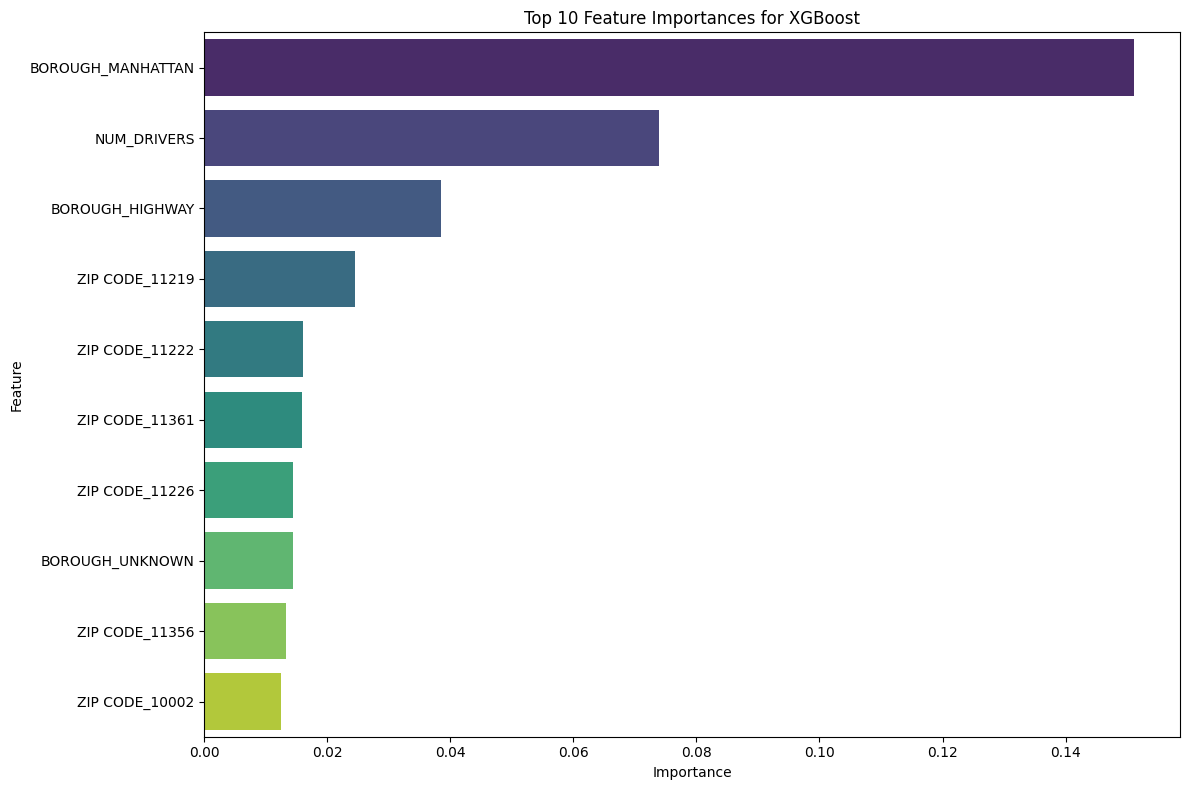

In [29]:
# feature importance
plot_features(results_xgb['feature_importance'], model='XGBoost')

### XGBoost with theshold evaluation


In [33]:
# function 
results_tres = xgboost_severity_classifier_tr(
    df_tree,  
    thresholds=[0.35, 0.40, 0.45, 0.50, 0.55, 0.60]  
)


Threshold = 0.35
Accuracy: 0.7403105104434268
Classification Report:
              precision    recall  f1-score   support

           0      0.799     0.879     0.837    332914
           1      0.444     0.305     0.361    105783

    accuracy                          0.740    438697
   macro avg      0.622     0.592     0.599    438697
weighted avg      0.713     0.740     0.722    438697

Confusion Matrix:
[[292529  40385]
 [ 73540  32243]]

Threshold = 0.4
Accuracy: 0.7564514915761904
Classification Report:
              precision    recall  f1-score   support

           0      0.787     0.932     0.853    332914
           1      0.488     0.205     0.288    105783

    accuracy                          0.756    438697
   macro avg      0.637     0.568     0.571    438697
weighted avg      0.715     0.756     0.717    438697

Confusion Matrix:
[[310206  22708]
 [ 84136  21647]]

Threshold = 0.45
Accuracy: 0.7636637588130304
Classification Report:
              precision    reca

### xgboost with tuning and thresholds

In [66]:
results_binary=xgboost_class_weight_classifier(df_tree, thresholds=[0.5, 0.52, 0.55, 0.6])

Training Class Distribution:
SEVERITY_CLASS
0    0.75925
1    0.24075
Name: proportion, dtype: float64

Class Weights:
{np.int64(0): np.float64(0.6585443748165795), np.int64(1): np.float64(2.0768456010452963)}
Initial Accuracy: 0.6475243733146112

Classification Report before threshold adjustment:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74    332914
           1       0.36      0.57      0.44    105783

    accuracy                           0.65    438697
   macro avg       0.59      0.62      0.59    438697
weighted avg       0.72      0.65      0.67    438697


Threshold: 0.5
Accuracy: 0.6475243733146112
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74    332914
           1       0.36      0.57      0.44    105783

    accuracy                           0.65    438697
   macro avg       0.59      0.62      0.59    438697
weighted avg       0.72      0.65 

In [67]:
# confusion matrix for threshold 0.55
conf_matrix_055 = get_confusion_matrix_at_threshold(results_binary, threshold=0.55)
conf_matrix_055

array([[256663,  76251],
       [ 57094,  48689]])

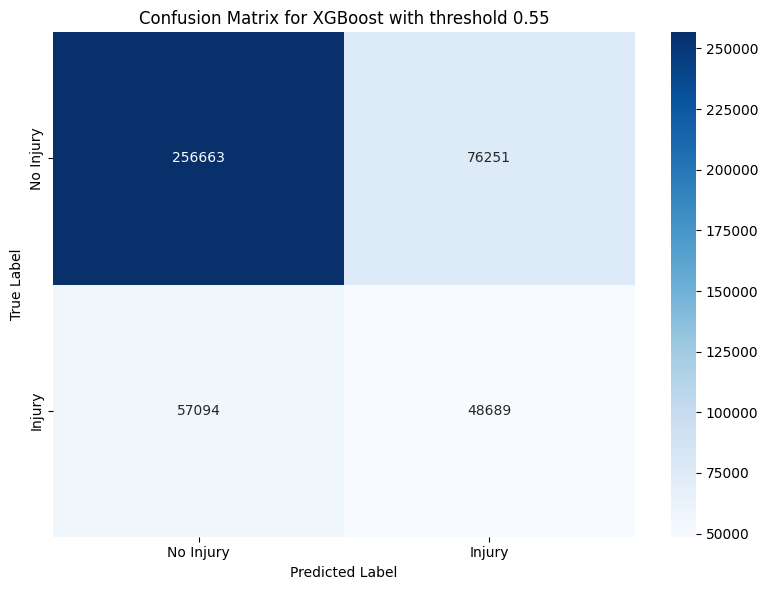

In [69]:
# conf matrix_plot
plot_confusion_matrix(conf_matrix_055, 'XGBoost with threshold 0.55')

In [68]:
#feature importance
feature_importance_xgb = results_binary['feature_importance']
feature_importance_xgb

LATITUDE          0.005080
LONGITUDE         0.005398
HOUR              0.007312
DAY_OF_WEEK       0.002227
MONTH             0.004274
                    ...   
ZIP CODE_11692    0.005847
ZIP CODE_11693    0.002815
ZIP CODE_11694    0.000000
ZIP CODE_11695    0.000000
ZIP CODE_11697    0.000972
Length: 253, dtype: float32

C:\Users\efade\ALY6140_GROUP_PROJECT\aly6140_utility_binary.py:782: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis', order=top_features.index)


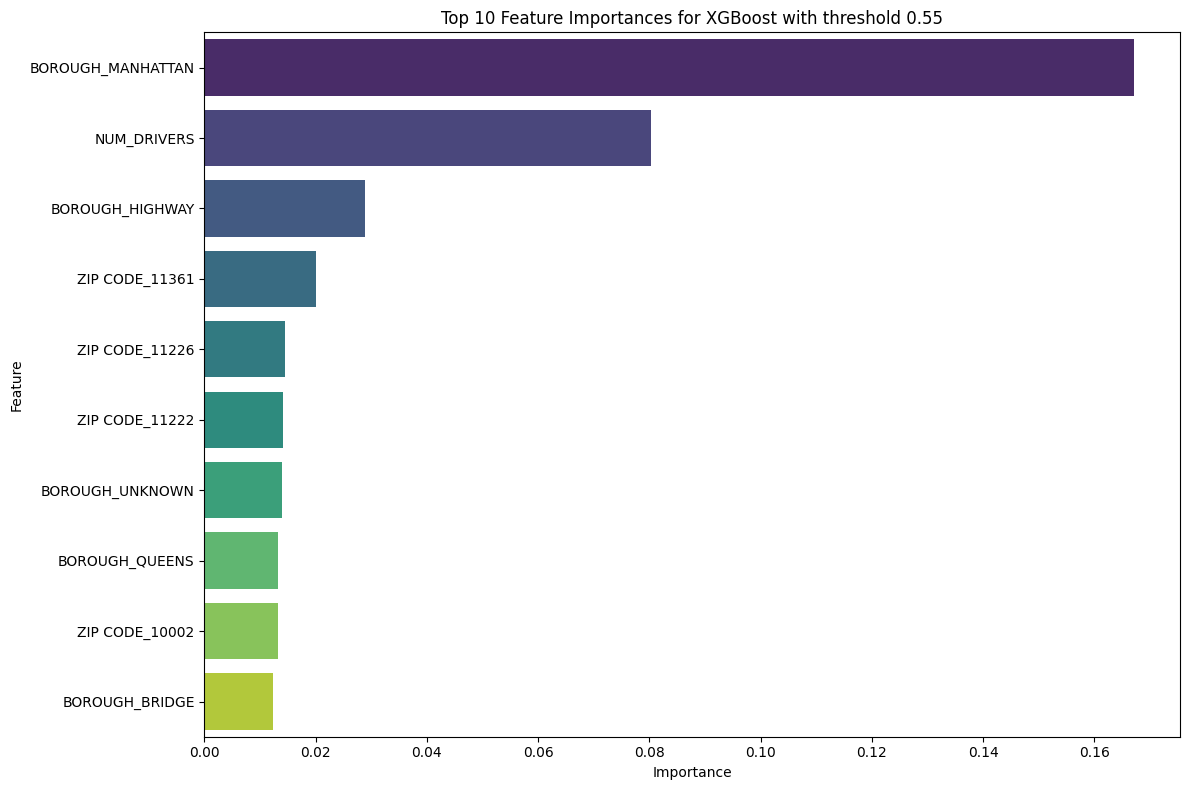

In [71]:
# plot
#  Visualize top features
plot_features(results_binary['feature_importance'], model='XGBoost with threshold 0.55')